<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L8_Clustering_K_means_%26_Hierachical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Differential Gene Expression. If you haven't completed these topics, please refer to [L07 - Differential Gene Expression](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/07-differential-gene-expression) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L08 - Clustering: K-means & Hierachical clustering](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/08-clustering-k-means-and-hierachical-clustering), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Load packages.**

In [ ]:
#Load libraries
library(stats)
library(tools)


This R code loads the "stats" and "tools" libraries into the R session using the library function. These libraries provide essential statistical functions and utility tools that can be used for various analyses and data manipulation tasks in R.

## **2. Load data.**

In [ ]:
#Load data
data <- read.table ("https://raw.githubusercontent.com/pine-bio-support/Unsupervised-codeomics/main/CellLines_7000Genes_marked_UI.txt", header = TRUE, row.names = 1)
#Check dimensions of data
dim(data)

[1] 6916   52


This R code loads tabular data from a URL into a data frame named "data" using the read.table function. The dataset is assumed to have headers, and the first column is used as row names. The dim function is then used to check and display the dimensions (number of rows and columns) of the loaded data.

In [ ]:
data

,NL_184A1,NL_184B5,B_21MT1,B_21NT,B_21PT,L_600MPE,L_AU565,L_BT474,L_BT483,CL_BT549,⋯,L_SUM225CWN,B_SUM229PE,L_SUM52PE,L_T47D,L_T47D_Kbluc,L_UACC812,L_UACC893,L_ZR751,L_ZR7530,L_ZR75B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,6.06,5.25,5.15,5.36,5.22,5.32,5.30,6.64,5.60,6.61,⋯,5.82,6.40,4.67,6.01,6.39,7.71,5.70,5.85,5.34,5.07
ENSG00000001036,4.47,5.39,5.28,5.82,5.75,6.11,4.80,4.47,4.99,6.94,⋯,5.51,5.14,6.22,5.07,5.30,5.76,5.40,4.27,5.03,5.68
ENSG00000001084,4.47,6.00,5.77,5.76,5.76,5.78,4.01,5.14,5.11,3.63,⋯,6.63,4.38,6.38,4.52,4.16,3.24,4.35,2.49,5.89,4.37
ENSG00000001497,5.27,4.27,6.58,5.54,5.57,4.93,6.16,5.36,5.10,6.16,⋯,4.69,6.16,5.11,4.79,4.95,5.83,4.89,5.33,4.23,6.03
ENSG00000001617,6.05,7.31,3.99,5.93,5.98,4.06,7.53,4.70,6.69,3.30,⋯,3.80,5.59,5.27,4.36,5.10,6.57,6.19,6.79,4.96,5.95
ENSG00000001630,6.24,5.26,5.67,6.11,5.77,6.74,5.15,6.14,5.27,3.88,⋯,7.08,5.49,8.10,4.76,5.16,4.58,4.19,5.35,5.45,5.23
ENSG00000001631,4.17,3.51,3.86,5.12,4.75,4.80,3.56,4.14,4.47,3.14,⋯,5.13,3.86,6.53,3.06,3.36,1.90,2.55,4.10,3.80,3.64
ENSG00000002330,6.55,7.49,5.69,5.00,4.90,4.20,6.69,5.81,5.39,5.94,⋯,7.00,5.73,6.74,6.85,6.96,6.94,7.17,6.09,5.04,5.32
ENSG00000002549,5.19,4.54,4.64,4.64,4.81,5.13,4.96,4.72,5.80,5.57,⋯,5.46,4.60,4.56,5.14,5.12,5.93,4.91,4.92,5.20,5.80


## **3. Transpose data.**

In [ ]:
#Transpose the data
data1 <- t(data)

#Check dimensions of data
dim(data1)

[1]   52 6916


This R code transposes the original data frame "data," creating a new transposed data frame named "data1" using the t function. The dim function is then used to check and display the dimensions of the transposed data, where the number of rows becomes the number of columns, and vice versa.

## **4. Plot Hierarchical Cluster.**

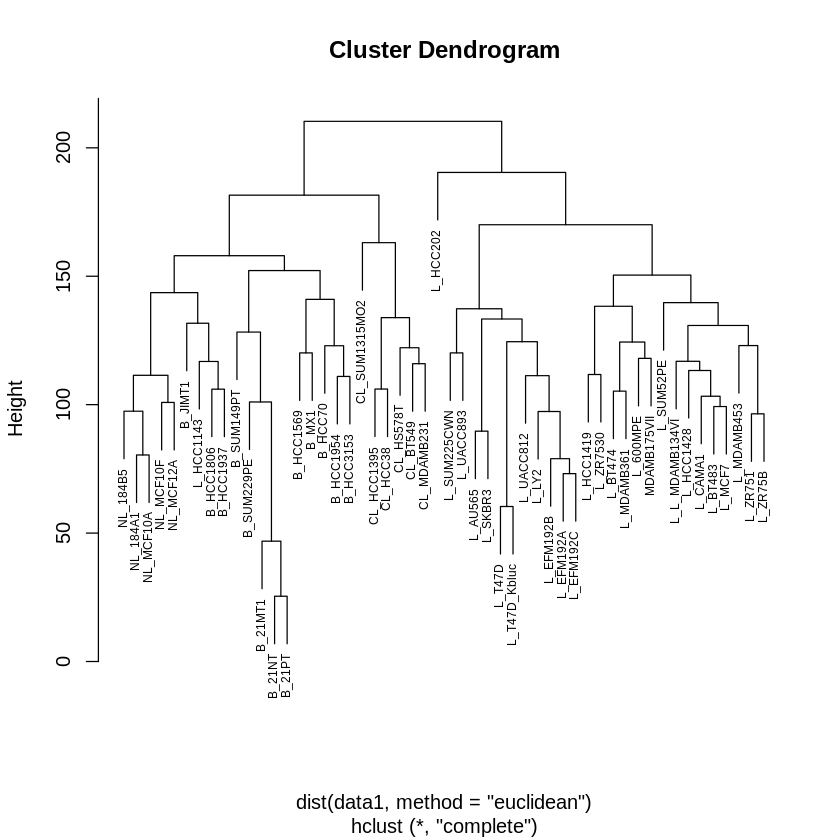

In [ ]:
# Define clustering and save in a object
# specify distance matrix (euclidean / manhattan / maximum / canberra / binary / minkowski) and linkage(single / complete / average / mean / centroid / ward.D / ward.D2) type
cl <- hclust(dist (data1, method="euclidean"), method="complete")

#Plot clusters
plot(cl, cex = 0.6)


This R code performs hierarchical clustering on the transposed data "data1." It calculates the distance matrix using the Euclidean distance measure and applies the complete linkage method. The resulting hierarchical clustering object is stored in the variable "cl." The plot function is then used to visualize the dendrogram representing the hierarchical clustering, with the argument cex = 0.6 controlling the size of the labels in the plot.

## **5. Define parameters.**

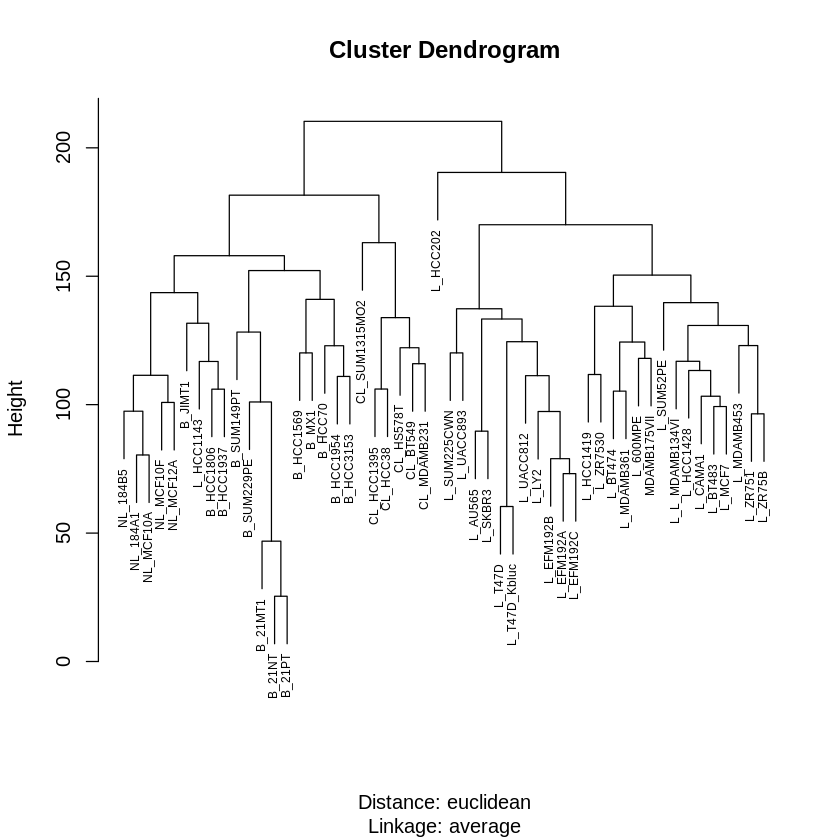

In [ ]:
#Define parameters and save in object
descr1 <- paste ("Distance: ", "euclidean", sep="")
descr2 <- paste ("Linkage: ", "average", sep="")

#Plot Clusters
plot(cl, xlab=descr1, sub=descr2, cex = 0.6)


This R code defines parameters for hierarchical clustering, specifically indicating that the distance measure used is "euclidean" and the linkage method is "complete." These parameters are stored as character strings in the objects "descr1" and "descr2." The plot function is then used to visualize the dendrogram with customized x-axis label ("Distance: euclidean") and subtitle ("Linkage: complete"). The cex = 0.6 argument controls the size of the labels in the plot.

## **6. Write cluster ids with samples in the file.**

In [ ]:
#cutree to get the required number of clusters and output cluster IDs for all the samples
clust_ids <- cutree(cl, k=5)
head(clust_ids)

#Output table with cluster IDs
txt_file_c <- paste("file_name", "_", "cRes_hclust.ClustersOnly", ".txt", sep="")
cat ("Object\tClusterID\n", file="ClustersOnly.txt", append=FALSE)


#Write into a file
write.table(clust_ids, file="ClustersOnly.txt", append=TRUE, sep="\t", col.names=FALSE, row.names=TRUE)

NL_184A1 NL_184B5  B_21MT1   B_21NT   B_21PT L_600MPE 
       1        1        1        1        1        2


This R code uses the cutree function to obtain cluster IDs for each sample based on hierarchical clustering with five clusters (k=5). The resulting cluster IDs are stored in the variable clust_ids. The code then prepares and writes this cluster information into a text file named "ClustersOnly.txt," including a header line with "Object" and "ClusterID." The file is formatted with tab-separated values and can be used for further analysis or interpretation.

## **7. Write full table with cluster ids with samples in the file.**

In [ ]:
#Output full table with cluster IDs
txt_file <- paste("file_name", "_", "cRes_hclust.FullTable", ".txt", sep="")
out_table <- cbind (clust_ids, data)
colnames (out_table) [1] <- "ClusterID"
cat ("Object\t", file="Full_table.txt", append=FALSE)

#Write into a file
write.table(out_table, file="Full_table.txt", append=TRUE, sep="\t", col.names=TRUE, row.names=TRUE)

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in write.table(out_table, file = "Full_table.txt", append = TRUE, :
“appending column names to file”


This R code creates a full table by combining the cluster IDs (clust_ids) with the original data (data). The resulting table is named "out_table," and the first column is renamed to "ClusterID." The code then prepares and writes this full table into a text file named "Full_table.txt," including a header line with "Object" and the column names from the original data. The file is formatted with tab-separated values and can be used for comprehensive downstream analysis or exploration of clustered data.